In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from synthcity.plugins import Plugins

eval_plugin = "bayesian_network"

In [2]:
# Load dataset
X, y = load_iris(return_X_y=True, as_frame=True)
X["target"] = y

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.8,2.9,1.5,0.1,0
1,5.1,3.0,1.7,0.2,0
2,4.9,3.0,1.5,0.4,0
3,4.4,2.6,1.6,0.1,0
4,5.6,2.5,1.5,0.3,0
5,5.0,3.2,1.5,0.2,0
6,7.0,2.5,1.6,0.2,0
7,5.0,2.4,1.5,0.4,0
8,4.8,3.2,1.4,0.2,0
9,4.9,4.1,1.5,0.4,0


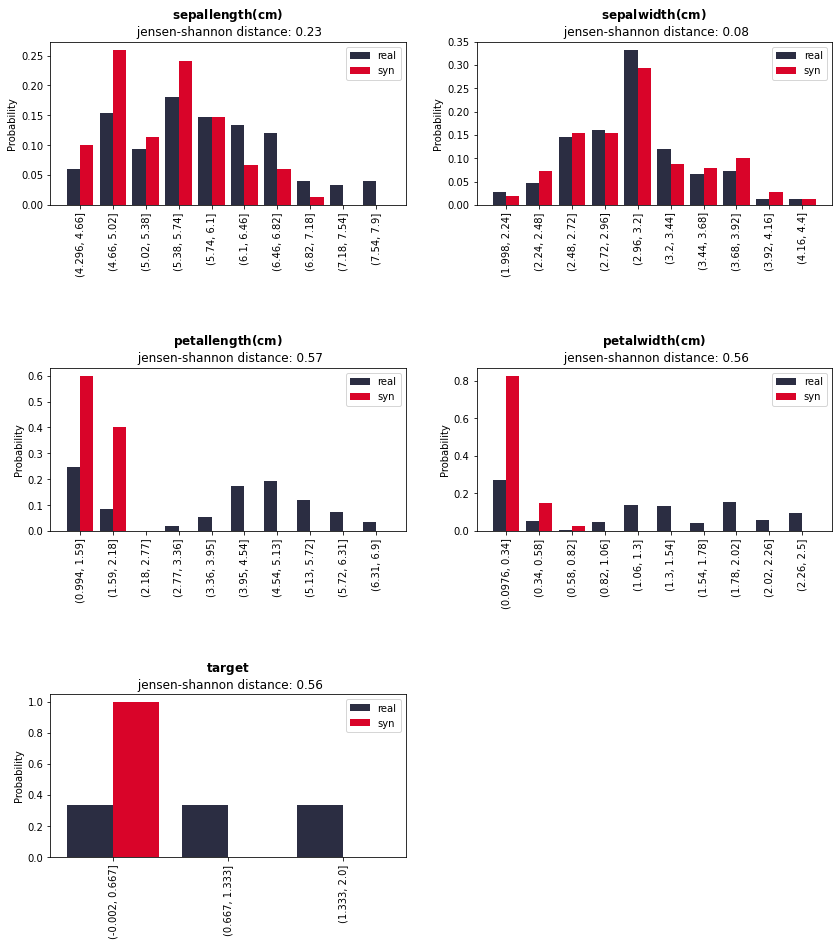

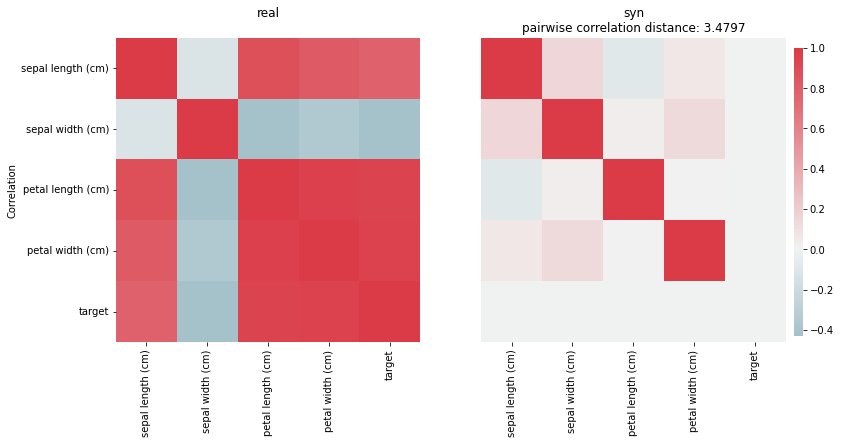

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [8]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sepal length (cm)","sepal width (cm)"],
    repeats = 3,
)

In [9]:
Benchmarks.print(score)


Plugin : bayesian_network


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
sanity.common_rows_proportion,0.013333,0.013333,0.013333,0.0,0.013333,0.0,3,0,0.01
sanity.avg_distance_nearest_neighbor,0.421281,0.429976,0.425839,0.003562,0.426261,0.004347,3,0,0.01
sanity.inlier_probability,0.333333,0.333333,0.333333,0.0,0.333333,0.0,3,0,0.01
sanity.outlier_probability,0.093333,0.126667,0.113333,0.014402,0.12,0.016667,3,0,0.01
statistical.inverse_kl_divergence,0.298114,0.306194,0.302916,0.00347,0.304439,0.00404,3,0,0.01
statistical.kolmogorov_smirnov_test,0.533333,0.536,0.535111,0.001257,0.536,0.001333,3,0,0.0
statistical.chi_squared_test,0.2,0.2,0.2,0.0,0.2,0.0,3,0,0.01
statistical.maximum_mean_discrepancy,0.287185,0.316248,0.30454,0.012519,0.310188,0.014532,3,0,0.0
statistical.inverse_cdf_distance,0.248614,0.270838,0.25819,0.00933,0.255117,0.011112,3,0,0.97
